<a href="https://colab.research.google.com/github/Otobi1/Back-to-Basics-A-Refresher-/blob/master/Back_to_Basics_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
## Neural Networks 

# - Here, we will explore Multi Layer Perceptrons (MLPs), which are a basic type of neural network

# - First, we attempt to motivate non-linear activation functions (fcl) by trying to fit a linear model (logistic regression) on our non-linear spiral data
# - Then we'll implement an MLP using just NumPy and then later on PyTorch
# REF - https://madewithml.com/courses/ml-foundations/neural-networks/ 

# Objective - predict the probability of class y given the inputs X. Non-linearity is introduced to model the complex, non-linear data

In [27]:
# Importing the necessary libraries 

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
SEED = 1234

In [29]:
# Set seed for reproducibility 

np.random.seed(SEED)

random.seed(SEED)

In [30]:
# Loading the data 

url = "https://raw.githubusercontent.com/GokuMohandas/madewithml/main/datasets/spiral.csv"
df = pd.read_csv(url, header = 0) # loading the data
df = df.sample(frac = 1).reset_index(drop = True) # Shuffle the data
df.head()

,X1,X2,color
0,0.106737,0.114197,c1
1,0.311513,-0.664028,c1
2,0.019870,-0.703126,c1
3,-0.054017,0.508159,c3
4,-0.127751,-0.011382,c3


In [31]:
# Exploring the data shapes 

X = df[["X1", "X2"]].values
y = df["color"].values

print (f"X: ", np.shape(X))
print (f"y: ", np.shape(y))

X:  (1500, 2)
y:  (1500,)


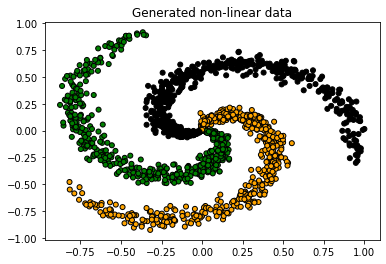

In [32]:
# Visualising the data 

plt.title("Generated non-linear data")
colors = {"c1": "orange", "c2": "green", "c3": "black"} # c1, c2, c3 are the classes within the colors column; this line just gives them some fun colors 
plt.scatter(X[:, 0], X[:, 1], c = [colors[_y] for _y in y], edgecolors = "k", s = 25)
plt.show()

In [33]:
# Splitting the data 

import collections 
from sklearn.model_selection import train_test_split

In [34]:
TRAIN_SIZE = 0.7 
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [35]:
def train_val_test_split(X, y, train_size):
  """Split dataset into data splits."""
  X_train, X_, y_train, y_ = train_test_split(X, y, train_size = TRAIN_SIZE, stratify = y)
  X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size = 0.5, stratify = y_)
  return (X_train, X_val, X_test, y_train, y_val, y_test)

In [36]:
# Creating the data splits using the function above 

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X = X, y = y, train_size = TRAIN_SIZE)

print (f"X_train: {X_train.shape}, y_train: {y_train.shape}") # Ensure you add (.shape) after so as not to print out the actual data (555 in Thai)
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[0]} -> {y_train[0]}")

X_train: (1050, 2), y_train: (1050,)
X_val: (225, 2), y_val: (225,)
X_test: (225, 2), y_test: (225,)
Sample point: [-0.63919105 -0.69724176] -> c1


In [37]:
# Label Encoding 

# in previous lessons, we wrote the complete label encoder to check under the hood. For this lesson we'll use sklearns LabelEncoder class 

from sklearn.preprocessing import LabelEncoder

In [38]:
# Output vectoriser 

label_encoder = LabelEncoder()

In [39]:
# Fitting it on the train data 

label_encoder = label_encoder.fit(y_train)
classes = list(label_encoder.classes_)
print (f"classes: {classes}")

classes: ['c1', 'c2', 'c3']


In [40]:
# Convert labels to tokens 

print (f"y_train[0]: {y_train[0]}") # Here we are checking the first color (class/label in the training set before applying the label transformer)

y_train = label_encoder.transform(y_train) # Here for each, we are transforming the labels in each of the data splits 
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

print (f"y_train[0]: {y_train[0]}") # Here, we want to check the transformed first color (class/label) in the training set

print (f"y_train[0:5]: {y_train[0:5]}") # Lets see the first 5 entries 

y_train[0]: c1
y_train[0]: 0
y_train[0:5]: [0 0 0 2 1]


In [52]:
# Class weights 

# - Here, we check how equal the different categories are distributed within the datset

counts = np.bincount(y_train) # Replace y_train here with y_val, or y_test to see the class distribution 

class_weights = {i: 1.0/count for i, count in enumerate(counts)}

print (f"counts: {counts}\nweights: {class_weights}")

counts: [350 350 350]
weights: {0: 0.002857142857142857, 1: 0.002857142857142857, 2: 0.002857142857142857}


In [53]:
# Standardising the data 

# Standardising (achieving zero mean and unit variance) such that a specific feature's magnitude doesnt affect how the model learns its weights
# We will only standardise the inputs X because our outputs y are class values

from sklearn.preprocessing import StandardScaler

In [54]:
# Standardise the data (mean = 0, std = 1) using training data

X_scaler = StandardScaler().fit(X_train)

In [55]:
# Apply scaler on training and test (do not standardise outputs for classification projects)

X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

In [56]:
# Check, the mean should be approx 0 and std should be approx 1

print (f"X_test[0]: mean: {np.mean(X_test[:, 0], axis = 0):.1f}, std: {np.std(X_test[:, 0], axis = 0):.1f}")
print (f"X_test[0]: mean: {np.mean(X_test[:, 1], axis = 0):.1f}, std: {np.std(X_test[:, 1], axis = 0):.1f}")

X_test[0]: mean: 0.1, std: 0.9
X_test[0]: mean: 0.0, std: 1.0


In [58]:
# Linear Model 

# - before using the neural networks, we will motivate the non-linear activation functions by implementing a general linear model (logistic regression).
# - We'll see why linear functions won't wokr for our dataset  

In [59]:
import torch 

In [60]:
# Set seed for reproducibility 

torch.manual_seed(SEED)

In [61]:
# Model 
# - We'll create our model using one layer of weights 

from torch import nn
import torch.nn.functional as F

In [62]:
INPUT_DIM = X_train.shape[1] # X is 2 dimensional
HIDDEN_DIM = 100
NUM_CLASSES = len(classes) # there are 3 classes

In [63]:
class LinearModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, num_classes):
    super(LinearModel, self).__init__()
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.fc2 = nn.Linear(hidden_dim, num_classes)

  def forward(self, x_in, apply_softmax = False):
    z = self.fc1(x_in) # Linear Activation 
    y_pred = self.fc2(z)
    if apply_softmax:
      y_pred = F.softmax(y_pred, dim = 1)
    return y_pred

In [64]:
# Initialise model

model = LinearModel(input_dim = INPUT_DIM, hidden_dim = HIDDEN_DIM, num_classes = NUM_CLASSES)
print (model.named_parameters)

<bound method Module.named_parameters of LinearModel(
  (fc1): Linear(in_features=2, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=3, bias=True)
)>


In [65]:
# Training the initialised model 

from torch.optim import Adam

In [66]:
LEARNING_RATE = 1e-2
NUM_EPOCHS = 10
BATCH_SIZE = 32

In [67]:
# Defining the loss 

class_weights_tensor = torch.Tensor(list(class_weights.values()))
loss_fn = nn.CrossEntropyLoss(weight = class_weights_tensor)

In [68]:
# Accuracy

def accuracy_fn(y_pred, y_true):
  n_correct = torch.eq(y_pred, y_true).sum().item()
  accuracy = (n_correct / len(y_pred)) * 100
  return accuracy

In [69]:
# Optimiser

optimiser = Adam(model.parameters(), lr = LEARNING_RATE)

In [70]:
# Convert data to tensors

X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)

X_val = torch.tensor(X_val)
y_val = torch.LongTensor(y_val)

X_test = torch.tensor(X_test)
y_test = torch.LongTensor(y_test)

In [71]:
# Training the model 

for epoch in range (NUM_EPOCHS):

  # Forward pass 
  y_pred = model(X_train)

  # Loss
  loss = loss_fn(y_pred, y_train)

  # Zero all gradients 
  optimiser.zero_grad()

  # Backward pass 
  loss.backward()

  # Update weights 
  optimiser.step()

  if epoch%1 == 0:
    predictions = y_pred.max(dim = 1) [1] #class
    accuracy = accuracy_fn(y_pred = predictions, y_true = y_train)
    print (f"Epoch: {epoch} | loss: {loss:.2f}, accuracy: {accuracy:.1f}")

Epoch: 0 | loss: 1.13, accuracy: 49.9
Epoch: 1 | loss: 0.91, accuracy: 50.3
Epoch: 2 | loss: 0.79, accuracy: 55.3
Epoch: 3 | loss: 0.74, accuracy: 54.6
Epoch: 4 | loss: 0.74, accuracy: 53.7
Epoch: 5 | loss: 0.75, accuracy: 53.6
Epoch: 6 | loss: 0.76, accuracy: 53.7
Epoch: 7 | loss: 0.77, accuracy: 53.8
Epoch: 8 | loss: 0.77, accuracy: 53.9
Epoch: 9 | loss: 0.78, accuracy: 53.9


In [72]:
# Evaluation 

import json
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [73]:
def get_performance(y_true, y_pred, classes):
  """Per-class performance metrics."""
  # Get metrics
  performance = {"overall": {}, "class": {}}
  metrics = precision_recall_fscore_support(y_true, y_pred)

  #Overall performance 
  performance["overall"]["precision"] = np.mean(metrics[0])
  performance["overall"]["recall"] = np.mean(metrics[1])
  performance["overall"]["f1"] = np.mean(metrics[2])
  performance["overall"]["num_samples"] = np.float64(np.sum(metrics[3]))

  # Per-class performance 
  for i in range(len(classes)):
    performance["class"][classes[i]] = {
        "precision": metrics[0][i],
        "recall": metrics[1][i],
        "f1":metrics[2][i],
        "num_samples": np.float64(metrics[3][i])
    }

  return performance

In [76]:
# Predictions 

y_prob = model(X_test.float(), apply_softmax = True) # Add a .float after X_test to prevent the RunTime error. If you remove it now, you'll knwo what i mean 
print (f"sample probability: {y_prob[0]}")

y_pred = y_prob.max(dim = 1) [1]
print (f"sample class: {y_pred[0]}")

sample probability: tensor([0.8995, 0.0286, 0.0719], grad_fn=<SelectBackward>)
sample class: 0


In [78]:
# Performance report 

performance = get_performance(y_true = y_test, y_pred = y_pred, classes = classes)
print (json.dumps(performance, indent = 2))

{
  "overall": {
    "precision": 0.5326832791621524,
    "recall": 0.5333333333333333,
    "f1": 0.5327986224880954,
    "num_samples": 225.0
  },
  "class": {
    "c1": {
      "precision": 0.5,
      "recall": 0.5066666666666667,
      "f1": 0.5033112582781457,
      "num_samples": 75.0
    },
    "c2": {
      "precision": 0.5211267605633803,
      "recall": 0.49333333333333335,
      "f1": 0.5068493150684932,
      "num_samples": 75.0
    },
    "c3": {
      "precision": 0.5769230769230769,
      "recall": 0.6,
      "f1": 0.5882352941176471,
      "num_samples": 75.0
    }
  }
}


In [79]:
# Now, lets plot the data again to see how well our linearly activated model performed 

def plot_multiclass_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
  cmap = plt.cm.Spectral

  X_test = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
  y_pred = model(X_test, apply_softmax = True)

  _, y_pred = y_pred.max(dim  = 1)
  y_pred = y_pred.reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap = plt.cm.Spectral, alpha = 0.8)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu_r)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


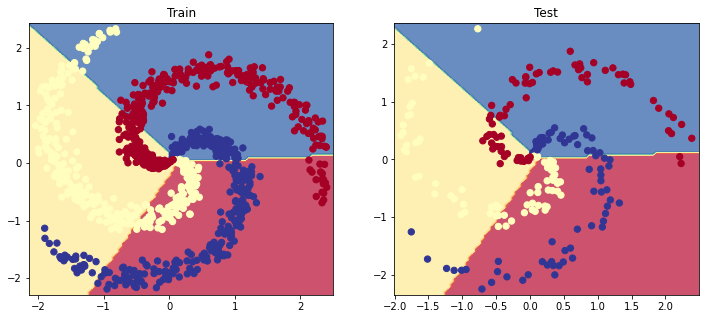

In [80]:
# Lets visualise the decision boundary 

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_multiclass_decision_boundary(model = model, X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_multiclass_decision_boundary(model = model, X = X_test, y = y_test)
plt.show()

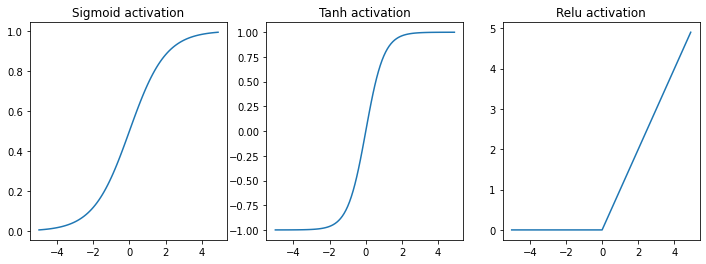

In [83]:
# Inference and the implication of the activation function used 

# - USing the general linear method for logistic regression yeilded poor results because of the non-linearity in the data (just to show this, we used a linear activation function)

## - to achieve better results, we need to use other activation functions that allows our model to learn and map the non-linearity in the data

# Here are a few options 

# Figure size 

plt.figure(figsize = (12, 4))

# Data
x = torch.arange(-5., 5., 0.1)

# Simoid activation function, (constrain a value between 0 and 1.)
plt.subplot(1, 3, 1)
plt.title("Sigmoid activation")
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())

# Tanh activation function, (constrain a value between -1 and 1.)
plt.subplot(1, 3, 2)
plt.title("Tanh activation")
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())

# Relu (clip the negative value to 0)
plt.subplot(1, 3, 3)
plt.title("Relu activation")
y = F.relu(x)
plt.plot(x.numpy(), y.numpy())

# Show plots
plt.show()